In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt
#np.uint8(22)
#pip install powerlaw
#from fractal import fractal_dimension
from scipy.ndimage import label, find_objects
from scipy.ndimage import label, generate_binary_structure
from scipy.ndimage.measurements import find_objects
from scipy.ndimage.morphology import binary_dilation
#import pyfrac

In [35]:
pip install pyfrac

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\tijn2\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip


In [6]:
pip install pycity

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pycity: filename=pycity-0.1.3-py3-none-any.whl size=4191 sha256=45849f7ab26784b8c2722ae9262b115cc0e2f49ee232ffa97898b54a9fc5573e
  Stored in directory: c:\users\tijn2\appdata\local\pip\cache\wheels\04\2f\b0\513f3baab8a18679d9d2ea0788382ac0a0274be448ac8d3d87
Successfully built pycity
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\tijn2\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip


In [9]:
import pycity
#from pycity import CityGenerator

In [2]:
def mincelfun(inarr, params = 3):
    """
    The function takes a timeslice of the array and calculates of proportions of each neighbour in Moore neighbourhood.
    """
    retprob = np.zeros(params)
    totsum = 0
    for rowarr in inarr:
        for val in rowarr:
            totsum += val[1] # Increases the total sum of cells that have some state
            try:
                retprob[int(val[0])] += float(val[1]) # Uses value to index type of cell and increase value in prob array.
            except:
                print(rowarr)
    if (totsum == 0): # Is this correct? totsum is only 0 if the function is passed an empty matrix. 
        retprob = np.zeros(params)
        retprob[0] = 1
        return retprob
    return retprob / float(totsum)

def CA_city(init_mat, moore_n = 1, params = 3, debug = False):
    """
    Loops through each cell and calculates its prob of changing state, then changes the state randomly.
    """
    # Assumes initmat is of shape N,N,2 
    init_dimx,init_dimy,init_pars = np.shape(init_mat)
    
    workgrid = np.zeros((init_dimx + 2 * moore_n, init_dimy + 2 * moore_n, init_pars))
    retgrid = init_mat.copy()
    workgrid[moore_n:-moore_n, moore_n:-moore_n] = init_mat
    # Loops through the matrix dimensions, calls mincelfun() to find the values of neighbour cells. 
    for i,rowarr in enumerate(init_mat):
        for j,val in enumerate(rowarr):
            probs = mincelfun(workgrid[i:i+1 + 2*moore_n,j:j+1+2*moore_n], params = 3)
            increase_param = np.random.choice(list(range(params)), 1, p = probs)
            # if/else checks which value was randomly selected in previous line and updates matrix accordingly.
            if increase_param == 0:
                continue
            elif increase_param == workgrid[i+moore_n, j+moore_n, 0]:
                retgrid[i,j,1] += 1
            else:
                retgrid[i,j] = [increase_param,1]
    return retgrid


def init_grid(N,params):
    """
    The function creates the initial state of the matrix and sets its values.
    Takes the dimensions of the grid and parameters as arguments and returns initial condition of matrix.
    """
    retgrid = np.zeros((N,N,2))
    center = math.floor(N/2) # finds the center of the grid
    retgrid[:,:,1] = 1 # sets the center of the grid as a 1.
    retgrid[center,center,0] =1
    
    return retgrid

In [3]:
dimensions = 50
time = 60
solution_dev = np.empty((time,dimensions,dimensions,2))
init_city = init_grid(dimensions,3)
solution_dev[0] = init_city
solution_dev[1] = CA_city(solution_dev[0])
for step in range(2,time):
    solution_dev[step] = CA_city(solution_dev[step-1])

C:\Users\tijn2\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


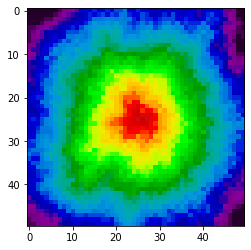

In [4]:
plt.imshow(solution_dev[59,:,:,1], cmap = 'nipy_spectral', vmin = 0, vmax = 60)

In [10]:
#init_grid(50,3)

In [12]:
# Set the size of the city (number of blocks)
city_size = (50, 50)

# Set the proportions of different land uses
land_use_probs = {
    'residential': 0.5,
    'commercial': 0.3,
    'industrial': 0.2
}

# Create an empty grid for the city
grid = np.empty(city_size, dtype=str)

# Generate the starting grid
for i in range(city_size[0]):
    for j in range(city_size[1]):
        land_use_type = np.random.choice(list(land_use_probs.keys()), p=list(land_use_probs.values()))
        grid[i, j] = land_use_type[0].upper()  # Use the first character as the code

# Print the grid
for row in grid:
    print(' '.join(row))


C R C C C R R R R I R I R R C R I I I R R R R C R C C I R R C R R R C C R C I R C R I R C C I C C C
R I I R R R C R I R R C R I I R I R R R I R C R R R R R R R C C I R R I I R R I R C C R I I C I R R
I C R I R R R I R I R R I R I R R I R C C I R C C I R I C R C I R C I R R C C I C R R R R R R R R R
R C R R R R R R R R C R C R C R I R R R R R C R R R I C I I C C C R R C C C C C R I C C I C R I R R
I R R C C C C I R C R C I R R R C R R C R R C R R R R C C C C C R I R C I I R R R I I R R R I C R R
C R C R R R R R I R C R R C C I I I C I C C I R C R R C R R C R R R I R R R C R R R R R C C C R C I
R R R R C R C I R I R I R R I I C R R R R R C R I R R C R I R C R R I C C I R R R I I I I R I R R I
I R R R I C C R R I R R R R I R C C C R R C R R I R C C R R R I R R R R C R C R C R C C R C R C C I
C C R R C I C I R I I C I I R R I R C R C I R C R C I I R R R I R R R R R R R I C R C R C C R R R I
R C R I I R R R R C R R C I R R R C R R R R I I R C R R R C C C R R R I C I I C C R C R C R C I R C


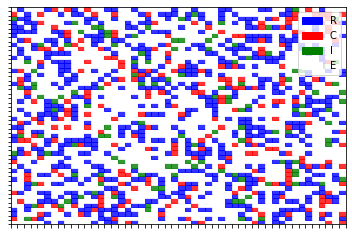

In [45]:
# Set the size of the city (number of blocks)
city_size = (50, 50)

# Set the proportions of different land uses
land_use_probs = {
    'residential': 0.25,
    'commercial': 0.1,
    'industrial': 0.05,
    'empty': 0.6
}

# Create an empty grid for the city
grid = np.empty(city_size, dtype=str)

# Generate the starting grid
for i in range(city_size[0]):
    for j in range(city_size[1]):
        land_use_type = np.random.choice(list(land_use_probs.keys()), p=list(land_use_probs.values()))
        grid[i, j] = land_use_type[0].upper()  # Use the first character as the code

# Set up colors for the land use types
colors = {'R': 'blue', 'C': 'red', 'I': 'green', 'E': 'white'}

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the grid with different colors for each state
for i in range(city_size[0]):
    for j in range(city_size[1]):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=colors[grid[i, j]], alpha=0.8))

# Set the axis limits and labels
ax.set_xlim(0, city_size[1])
ax.set_ylim(0, city_size[0])
ax.set_xticks(np.arange(city_size[1] + 1))
ax.set_yticks(np.arange(city_size[0] + 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add a legend for the land use types
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
ax.legend(legend_patches, colors.keys(), loc='upper right')

# Show the plot
plt.show()


In [47]:
grid

array([['E', 'E', 'E', ..., 'C', 'E', 'C'],
       ['C', 'E', 'I', ..., 'E', 'E', 'R'],
       ['R', 'E', 'E', ..., 'R', 'E', 'C'],
       ...,
       ['I', 'R', 'R', ..., 'C', 'I', 'E'],
       ['C', 'E', 'R', ..., 'C', 'E', 'C'],
       ['E', 'R', 'E', ..., 'E', 'E', 'E']], dtype='<U1')

In [42]:
ca = np.random.randint(0, 3, size=(100, 100))

In [50]:
# Define the number of states in the cellular automaton
num_states = ['R','C','I','E'] #4

# Calculate the fractal dimension for each state
fractal_dims = []
for state in num_states:#range(num_states):
    # Create a binary mask for the current state
    state_mask = (grid == state)

    # Calculate the fractal dimension for the state
    bounding_box = find_objects(state_mask)[0]
    width = bounding_box[0].stop - bounding_box[0].start
    height = bounding_box[1].stop - bounding_box[1].start
    area = np.count_nonzero(state_mask)
    perimeter = 2 * (width + height)
    fractal_dim = np.log(perimeter) / np.log(area)
    fractal_dims.append(fractal_dim)

# Print the fractal dimension for each state
for state, fractal_dim in enumerate(fractal_dims):
    print(f"Fractal dimension for state {num_states[state]}: {fractal_dim}")


Fractal dimension for state R: 0.819590841310618
Fractal dimension for state C: 0.9660006433777051
Fractal dimension for state I: 1.0899080885828014
Fractal dimension for state E: 0.7252147376003798
